# Plotting SAXS profiles 

### The script is used to plot SAXS profiles to visualize the data. In one figure there're:
1. The background subtracted (BGS) SAXS profiles in log x, linear y. (the BG here is defined as the first SAXS scan)
2. The raw (WBG) SAXS profiles in log x, log y.
3. The colorbar which corresponds to scan numbers.

### The script allows uses to define these parameters:
1. The frame number: x
2. The q range: n1 & n2 (the starting & the end point)

### The whole script is separated into three sections:
1. Import the data and do the BG subtraction and ratio correction.
2. Plot SAXS profiles of "Lithiation".
3. Plot SAXS profiles of "Delithiation".

(Users can modify the loop after the section 2 to plot SAXS profiles of assigned frames.)

## Section 1: Import SAXS data + BG subtraction + Ratio correction

Therefore, please pay attention to this line "for i in range(88,200)" to import data correctly.

#### Lithiation:
The SAXS profiles of "lithiation" are stored in "finaldfs" for BGS & "withBG" for WBG.

#### Delithiation:
While the SAXS profiles of "lithiation" are stored in "finaldfs2" for BGS & "withBG2" for WBG.

# 0.1C 1st cycle

In [121]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

x = 26

path_BG = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/SAXS/SAXS_3/01_01C/'
path_data = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/SAXS/SAXS_3/01_01C/'
file_name = '01_01C_0001_'
frame = '_00%02d.dat' %x
file_BG = '01_01C_0001_0006_00%02d.dat' %x

###import BG
BG = pd.read_csv(path_BG + file_BG, delimiter='    ', skiprows=23, names= ['q','BG'], engine='python')

###import data
dfs=[]

# scan 05~78: lithiation
# scan 78~90: hold
# scan 90~167: Delithiation

for i in range(300): 
    name = file_name+ '%04d' %i + frame
    if name in os.listdir(path_data):
        dfs.append(pd.read_csv(path_data + name, delimiter='    ', skiprows=23, usecols=[1] , names= ['%d'%i], engine='python'))
    else:
        continue

In [122]:
###combine data

finaldfs = pd.concat(dfs, axis=1) #This will be the BG subtracted one
withBG =  pd.concat(dfs, axis=1) 

del finaldfs['6']
del withBG['6']

###BG subtraction
for col in finaldfs.columns :
    finaldfs[col] = finaldfs[col] - BG['BG']

#finaldfs=finaldfs+7.5e8 #abs(min(finaldfs.min()))

In [42]:
###combine data

finaldfs2 = pd.concat(dfs, axis=1) #This will be the BG subtracted one
withBG2 =  pd.concat(dfs, axis=1) 

#del finaldfs['6']
#del withBG['6']

###BG subtraction
for col in finaldfs2.columns :
    finaldfs2[col] = finaldfs2[col] - BG['BG']

#finaldfs=finaldfs+7.5e8 #abs(min(finaldfs.min()))

In [126]:
for col in withBG.columns :
    withBG[col] = (withBG[col]-withBG[col].min())/(withBG[col].max()-withBG[col].min())

In [46]:
for col in withBG2.columns :
    withBG2[col] = (withBG2[col]-withBG2[col].min())/(withBG2[col].max()-withBG2[col].min())

### Import the dataframe of the ratio of the SAXSdio/mondio to correct the data.

This part isn't necessary and can be skipped.

In [7]:
ratiodf = pd.read_csv('C:/Users/opid31/Desktop/Scripts for SAXS & WAXS/ratio_01_lithiation.csv')

In [8]:
for i in finaldfs.columns:
    ratio = float(ratiodf.loc[x,i])
    finaldfs[i] = finaldfs[i].mul(ratio)
    
for i in withBG.columns:
    ratio = float(ratiodf.loc[x,i])
    withBG[i] = withBG[i].mul(ratio)

In [55]:
for i in finaldfs2.columns:
    ratio = float(ratiodf.loc[x,i])
    finaldfs2[i] = finaldfs2[i].mul(ratio)
    
for i in withBG2.columns:
    ratio = float(ratiodf.loc[x,i])
    withBG2[i] = withBG2[i].mul(ratio)

## Section 2: Plot lithiation

In [124]:
########################
n1 = 0
n2 = 1500
########################

Text(0.5, 0, 'd* (nm)')

C:\Users\opid31\AppData\Local\Temp\ipykernel_20868\3628894865.py:67: RuntimeWarning: divide by zero encountered in true_divide
  return 2*np.pi/10/x


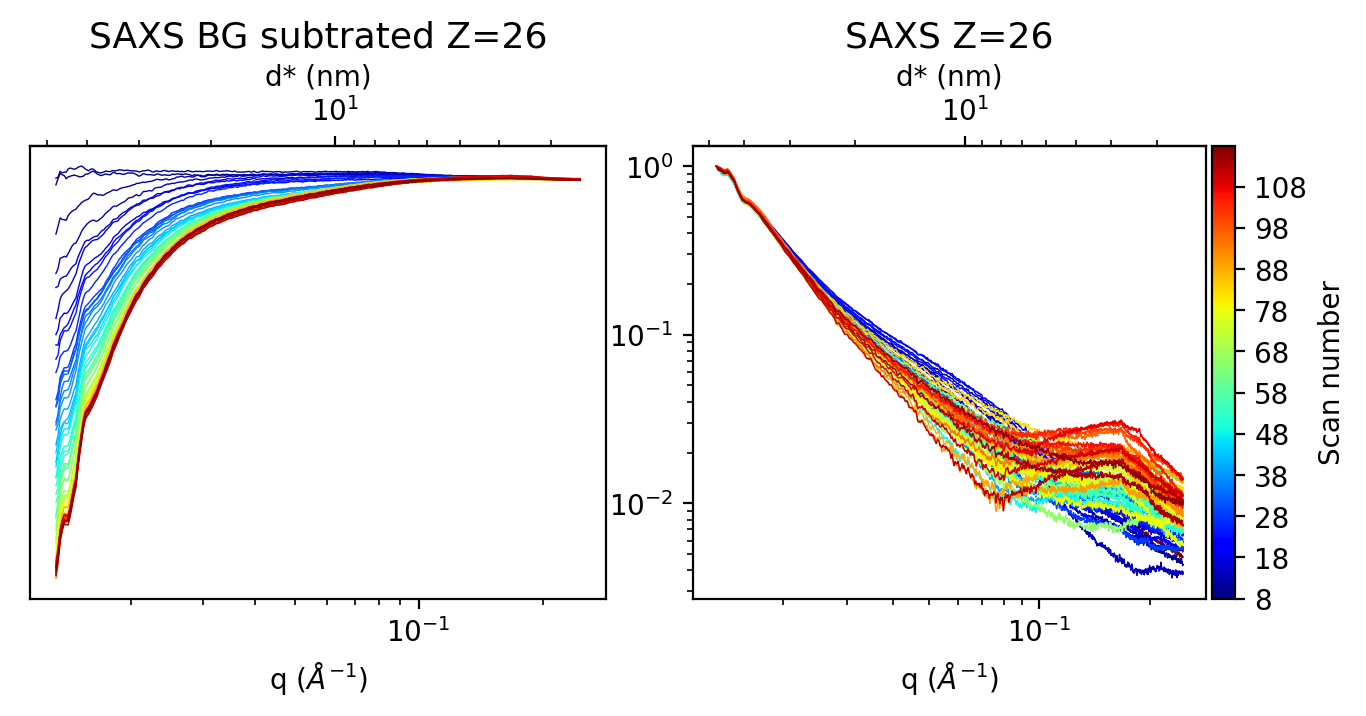

In [48]:
fig = plt.figure(figsize=(8, 3), dpi=200)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.15)

BGS = fig.add_subplot(grid[0, 0])
WBG = fig.add_subplot(grid[0, 1])

#how to type the symbol
#r'$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4} \binom{3}{4}$', fontsize=18

BGS.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
BGS.set_title('SAXS BG subtrated Z=%02d' %x, fontdict={'fontsize':13})

WBG.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
WBG.set_title('SAXS Z=%02d' %x, fontdict={'fontsize':13})

scannum = int(finaldfs.columns[-1])
startnum = int(finaldfs.columns[0])
colnum = len(finaldfs.columns)

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = startnum, vmax = scannum)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

### plot and set the color
colors = plt.cm.jet(np.linspace(0, 1, colnum))

i=0
for col in finaldfs.columns:
    BGS.plot(BG['q'][n1:n2], finaldfs[col][n1:n2], color=colors[i], lw=0.5)
    i=i+1
    
BGS.set_yticks([])
#plt.xticks(np.arange(0, 0.12, step=0.02))
#BGS.set_yscale('log')
BGS.set_xscale('log')
    

i=-1
for col in withBG.columns:
    WBG.plot(BG['q'][n1:n2], withBG[col][n1:n2], color=colors[i], lw=0.5)
    i=i+1

### customize the ticks and lables
WBG.set_yticks([])
#plt.xticks(np.arange(0, 0.12, step=0.02))
WBG.set_xscale('log')
WBG.set_yscale('log')

ticks = list(range(startnum, scannum,10))

#Set the color bar
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

#selecting the scale
#plt.xlim(0.1)
#plt.ylim(-5e8)


#Add secondary x axis
def q2d(x):
    return 2*np.pi/10/x

def d2q(x):
    return 2*np.pi/10/x

secax = BGS.secondary_xaxis('top', functions=(q2d,d2q))
secax.set_xlabel('d* (nm)')

secax2 = WBG.secondary_xaxis('top', functions=(q2d,d2q))
secax2.set_xlabel('d* (nm)')

#plt.savefig('SAXS_panel_01C_N lithiation Z=%d'%x + ' n=%d'%n1 + '~%d.png'%n2, bbox_inches='tight')

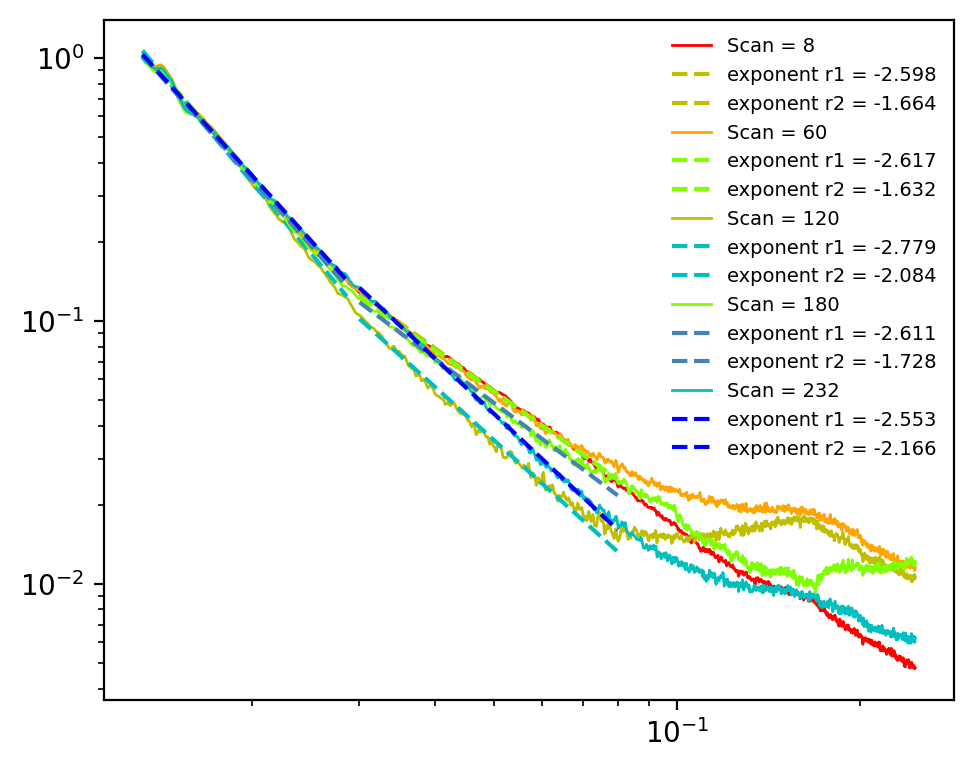

In [127]:
fig_2 = plt.figure(figsize=(5,4),dpi=200)
axes_2 = fig_2.add_axes([0.1, 0.1, 0.85, 0.85])

from scipy.optimize import curve_fit

scan = [8,60,120,180,232]
exponent_r1 = []
exponent_r2 = []


# for q = 0.00 ~ 0.02314
q1 = 0
q2 = 100

# for q = 0.03 ~ 0.08
q3 = 108
q4 = 429

def func(x, a, b):
    return a * np.power(x,b)


#popt: Optimal values for the parameters
#pcov: The estimated covariance of popt
colorlist=['red', 'orange', 'y',  'Chartreuse', 'c', '#4682B4', 'b', 'm']

#axes_2.set_prop_cycle(color=colorlist)

for i in range(len(scan)):
    plt.plot(BG['q'][n1:n2],withBG[str(scan[i])][n1:n2], lw = 1, color = colorlist[i], label = 'Scan = %d' %scan[i])
    exponent_r1.append(curve_fit(func, BG['q'][q1:q2], withBG[str(scan[i])][q1:q2]))
    exponent_r2.append(curve_fit(func, BG['q'][q3:q4], withBG[str(scan[i])][q3:q4]))
    plt.plot(BG['q'][q1:q2], func(BG['q'][q1:q2], *exponent_r1[i][0]), '--', color = colorlist[i+2], label='exponent r1 = %.3f' % exponent_r1[i][0][1])
    plt.plot(BG['q'][q3:q4], func(BG['q'][q3:q4], *exponent_r2[i][0]), '--', color = colorlist[i+2], label='exponent r2 = %.3f' % exponent_r2[i][0][1])
    
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, fontsize=7)


#plt.savefig('BT2_SAXS_3_01C fitting.png', bbox_inches='tight')




In [113]:
finaldfs

,8,10,12,14,16,18,20,22,24,26,...,214,216,218,220,222,224,226,228,230,232
0,-22255000.0,4498000.0,-221805000.0,-381527000.0,-438439000.0,-563385000.0,-629643000.0,-670995000.0,-729629000.0,-783542000.0,...,-1.328197e+09,-1.321162e+09,-1.246327e+09,-1.269729e+09,-1.244147e+09,-1.208314e+09,-1.211698e+09,-1.184461e+09,-1.158586e+09,-1.166057e+09
1,2817000.0,9033000.0,-190721000.0,-361994000.0,-433682000.0,-529613000.0,-609712000.0,-672750000.0,-711826000.0,-760256000.0,...,-1.261967e+09,-1.267910e+09,-1.213713e+09,-1.220129e+09,-1.211590e+09,-1.171539e+09,-1.167168e+09,-1.142196e+09,-1.125942e+09,-1.126801e+09
2,23976000.0,32698000.0,-156312000.0,-319501000.0,-405080000.0,-485669000.0,-563233000.0,-629174000.0,-655359000.0,-718989000.0,...,-1.187457e+09,-1.185645e+09,-1.145982e+09,-1.153985e+09,-1.143641e+09,-1.102866e+09,-1.090243e+09,-1.063004e+09,-1.059670e+09,-1.059653e+09
3,18763000.0,26298000.0,-162793000.0,-316843000.0,-398670000.0,-467225000.0,-553537000.0,-616289000.0,-633240000.0,-708300000.0,...,-1.152334e+09,-1.148851e+09,-1.117160e+09,-1.130806e+09,-1.114412e+09,-1.079113e+09,-1.058019e+09,-1.030044e+09,-1.037924e+09,-1.027344e+09
4,15391000.0,28990000.0,-163500000.0,-312250000.0,-393726000.0,-459572000.0,-542040000.0,-601066000.0,-613810000.0,-697186000.0,...,-1.129445e+09,-1.125319e+09,-1.099435e+09,-1.109866e+09,-1.092132e+09,-1.062211e+09,-1.034351e+09,-1.009457e+09,-1.017432e+09,-1.005104e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,3886867.0,0.0,5576454.0,6905394.0,0.0,0.0,0.0,723443.4,0.0,...,0.000000e+00,3.544233e+05,0.000000e+00,1.188917e+06,9.108831e+05,0.000000e+00,0.000000e+00,1.401588e+05,0.000000e+00,0.000000e+00
2996,145746.4,2611230.0,0.0,3512666.0,5034045.0,0.0,0.0,0.0,486015.4,0.0,...,0.000000e+00,2.381046e+05,2.933888e+06,2.481121e+06,1.536330e+06,0.000000e+00,0.000000e+00,1.433127e+06,0.000000e+00,0.000000e+00
2997,230564.9,4918071.0,0.0,1514798.0,3918831.0,0.0,0.0,0.0,341044.3,0.0,...,0.000000e+00,1.670816e+05,6.333683e+06,2.760775e+06,1.538421e+06,0.000000e+00,0.000000e+00,4.589178e+06,0.000000e+00,0.000000e+00
2998,333626.9,5153940.0,0.0,2530090.0,759761.8,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,9.542652e+06,2.442460e+06,1.036746e+06,0.000000e+00,0.000000e+00,7.006560e+06,0.000000e+00,0.000000e+00


In [93]:
exponent_r1

[(array([ 1.12586898e-05, -2.64057424e+00]),
  array([[1.03028293e-12, 2.21184649e-08],
         [2.21184649e-08, 4.75724270e-04]]))]

## Section 3: Plot delithiation

In [60]:
########################
n1 = 0
n2 = 300
########################

C:\Users\opid31\AppData\Local\Temp\ipykernel_20868\29255817.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return 2*np.pi/10/x


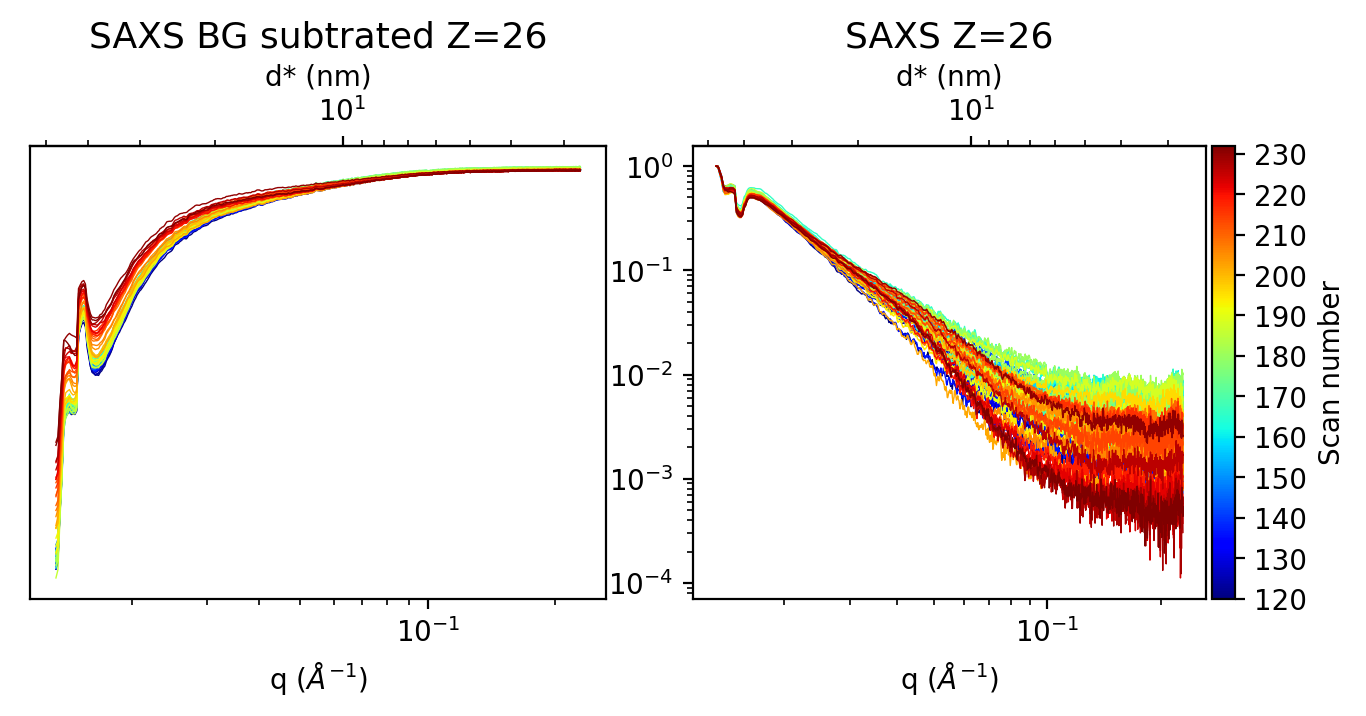

In [40]:
fig = plt.figure(figsize=(8, 3), dpi=200)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.15)

BGS = fig.add_subplot(grid[0, 0])
WBG = fig.add_subplot(grid[0, 1])

#how to type the symbol
#r'$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4} \binom{3}{4}$', fontsize=18

BGS.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
BGS.set_title('SAXS BG subtrated Z=%02d' %x, fontdict={'fontsize':13})

WBG.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
WBG.set_title('SAXS Z=%02d' %x, fontdict={'fontsize':13})

scannum = int(finaldfs2.columns[-1])
startnum = int(finaldfs2.columns[0])
colnum = len(finaldfs2.columns)

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = startnum, vmax = scannum)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

### plot and set the color
colors = plt.cm.jet(np.linspace(0, 1, colnum))


i=0
for col in finaldfs2.columns:
    BGS.plot(BG['q'][n1:n2], finaldfs2[col][n1:n2], color=colors[i], lw=0.5)
    i=i+1
    
BGS.set_yticks([])
#plt.xticks(np.arange(0, 0.12, step=0.02))
#BGS.set_yscale('log')
BGS.set_xscale('log')
    

i=0
for col in withBG2.columns:
    WBG.plot(BG['q'][n1:n2], withBG2[col][n1:n2], color=colors[i], lw=0.5)
    i=i+1

### customize the ticks and lables
WBG.set_yticks([])
#plt.xticks(np.arange(0, 0.12, step=0.02))
WBG.set_xscale('log')
WBG.set_yscale('log')

ticks = list(range(startnum, scannum,10))

#Set the color bar
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

#selecting the scale
#plt.xlim(0.1)
#plt.ylim(-5e8)


#Add secondary x axis
def q2d(x):
    return 2*np.pi/10/x

def d2q(x):
    return 2*np.pi/10/x

secax = BGS.secondary_xaxis('top', functions=(q2d,d2q))
secax.set_xlabel('d* (nm)')

secax2 = WBG.secondary_xaxis('top', functions=(q2d,d2q))
secax2.set_xlabel('d* (nm)')

plt.savefig('SAXS_panel_01C_N delithiation Z=%d'%x + ' n=%d'%n1 + '~%d.png'%n2, bbox_inches='tight')

In [62]:
finaldfs.to_csv('01_lithiation_lithiation_BGS.csv', index=False)
finaldfs2.to_csv('01_lithiation_delithiation_BGS.csv', index=False)
withBG.to_csv('01_lithiation_lithiation_WBG.csv', index=False)
withBG2.to_csv('01_lithiation_delithiation_WBG.csv', index=False)

## The useful for loop for plotting multiple frames

In [ ]:
for n in range(600,2000,200):
    fig = plt.figure(figsize=(8, 3), dpi=200)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.15)

    BGS = fig.add_subplot(grid[0, 0])
    WBG = fig.add_subplot(grid[0, 1])

    #how to type the symbol
    #r'$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4} \binom{3}{4}$', fontsize=18

    BGS.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
    BGS.set_title('SAXS BG subtrated Z=%02d' %x, fontdict={'fontsize':13})

    WBG.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':10})
    WBG.set_title('SAXS Z=%02d' %x, fontdict={'fontsize':13})

    scannum = int(finaldfs.columns[-1])
    startnum = int(finaldfs.columns[0])
    colnum = len(finaldfs.columns)

    cmap = plt.cm.get_cmap("jet")
    norm = mpl.colors.Normalize(vmin = startnum, vmax = scannum)

    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    ### plot and set the color
    colors = plt.cm.jet(np.linspace(0, 1, colnum))

    i=0
    for col in finaldfs.columns:
        BGS.plot(BG['q'][0:n], finaldfs[col][0:n], color=colors[i], lw=0.5)
        i=i+1

    BGS.set_yticks([])
    #plt.xticks(np.arange(0, 0.12, step=0.02))
    #BGS.set_yscale('log')
    BGS.set_xscale('log')


    i=0
    for col in withBG.columns:
        WBG.plot(BG['q'][0:n], withBG[col][0:n], color=colors[i], lw=0.5)
        i=i+1

    ### customize the ticks and lables
    WBG.set_yticks([])
    #plt.xticks(np.arange(0, 0.12, step=0.02))
    WBG.set_xscale('log')
    WBG.set_yscale('log')

    ticks = list(range(startnum, scannum,10))

    #Set the color bar
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

    #selecting the scale
    #plt.xlim(0.1)
    #plt.ylim(-5e8)


    #Add secondary x axis
    def q2d(x):
        return 2*np.pi/10/x

    def d2q(x):
        return 2*np.pi/10/x

    secax = BGS.secondary_xaxis('top', functions=(q2d,d2q))
    secax.set_xlabel('d* (nm)')

    secax2 = WBG.secondary_xaxis('top', functions=(q2d,d2q))
    secax2.set_xlabel('d* (nm)')

    plt.savefig('SAXS lithiation Z=%d'%x +'n=%d .png'%n, bbox_inches='tight')

In [ ]:
BG

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

y = savgol_filter(finaldfs['165'], window_length = 21, polyorder=5)
y2 = interp1d(BG['q'], finaldfs['165'], kind='quadratic')
plt.plot(BG['q'][0:100], y[0:100]+2.5e6)
plt.plot(BG['q'][0:100], finaldfs['165'][0:100]+1e6)
#plt.plot(y2.x[0:100],y2.y[0:100])


In [ ]:
#plt.plot(BG['q'],finaldfs['71'])
#plt.plot(BG['q'],finaldfs['69'])
#plt.plot(BG['q'],finaldfs['67'])
#plt.plot(BG['q'],finaldfs['65'])
plt.plot(BG['q'],finaldfs['63'])
plt.plot(BG['q'],finaldfs['59'])

In [ ]:
finaldfs